<a href="https://colab.research.google.com/github/Izquazzle/appl/blob/main/INFO371_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drexel University
## College of Computing and Informatics
## INFO 371: Data Mining Applications
## Assignment 4

## Due Date: Sunday, May 25, 2025
### This assignment counts for 15% of the final grade


## **DON'T FORGET TO PUT YOUR NAME BELOW**

## **NAME:**


### A. What to Hand In

1. A completed this Jupyter notebook.
2. Any data sets used in the assignment.
3. Any multimedia and images used in the assignment.

### B. How to Hand In

Submit your files through the course website in the Blackboard Learn system.

### C. When to Hand In

1. Submit your assignment no later than 11:59pm in the due date.
2. There will be a 10% (absolute value) deduction for each day of lateness, to a maximum of 3 days; assignments will not be accepted beyond that point. Missing work will earn a zero grade.

### D. Answer the questions.

## Import Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import h5py

import keras

## Description
- In this assignment you are asked to build neural networks to classify butterflies.
- The dataset and problem are from Kaggle's Butterfly Image Classification: https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification

## Use GPU in the Runtime type.
- Change the runtime type to the available GPU.
- Run the following code to check the availability of GPU.

In [12]:
import tensorflow as tf

# Check for GPU availability
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Set TensorFlow to use GPU if available
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)  # Avoids memory allocation issues
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')  # Use only the first GPU
        print("Using GPU:", gpus[0])
    except RuntimeError as e:
        print(e)

Num GPUs Available:  1
Using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


## The Dataset
- The dataset contains 75 different classes of Butterflies.
- The dataset contains 6499 butterfly images with labels.
- The dataset is stored in the file `butterfly_labels.h5`.
- The following code loads the images as a $6499\times 64\times 64\times 3$ numpy array and the corresponding $6499$ labels.

In [14]:
# copy the path of the file butterfly_labels.h5
input_h5_file= "/home/butterfly_labels.h5"

# load the saved HDF5 file
with h5py.File(input_h5_file, "r") as f:
    images = f["images"][:]  # Load images
    labels = f["labels"][:]  # Load labels (stored as bytes)

    # Convert bytes to strings
    labels = [label.decode("utf-8") for label in labels]

## Question 1 [5 points]: Show the labels of the first 10 images.

### Answer:

In [15]:
#the for loop iterates through the images and returns the label name for the first x images
for i in range(10):
    print(f"Image {i+1}: {labels[i]}")

Image 1: SOUTHERN D
Image 2: ADONIS
Image 3: BROWN SIPR
Image 4: MONARCH
Image 5: GREEN CELL
Image 6: CAIRNS BIR
Image 7: GREEN CELL
Image 8: EASTERN DA
Image 9: BROWN SIPR
Image 10: RED POSTMA


## Question 2 [5 points]: Show the shape of the `images` array.

### Answer:

In [16]:
print("Images array shape:", images.shape)

Images array shape: (6499, 64, 64, 3)


## Question 3 [5 points]: Verify that there are 75 uniques labels and list the labels.

### Answer:

In [17]:
# Get unique labels
unique_labels = sorted(set(labels))

# Print number of unique labels and the labels themselves
print(f"Number of unique labels: {len(unique_labels)}")
print("Unique labels:")

#prints out unique label name and a number next to it
i = 1
for label in unique_labels:
    print(f"Label {i}: {labels[i]}")
    i += 1


Number of unique labels: 75
Unique labels:
Label 1: ADONIS
Label 2: BROWN SIPR
Label 3: MONARCH
Label 4: GREEN CELL
Label 5: CAIRNS BIR
Label 6: GREEN CELL
Label 7: EASTERN DA
Label 8: BROWN SIPR
Label 9: RED POSTMA
Label 10: MANGROVE S
Label 11: BLACK HAIR
Label 12: CABBAGE WH
Label 13: RED ADMIRA
Label 14: PAINTED LA
Label 15: MANGROVE S
Label 16: PAPER KITE
Label 17: SOOTYWING
Label 18: PINE WHITE
Label 19: PEACOCK
Label 20: CHECQUERED
Label 21: JULIA
Label 22: COMMON WOO
Label 23: BLUE MORPH
Label 24: CLOUDED SU
Label 25: STRAITED Q
Label 26: ORANGE OAK
Label 27: PURPLISH C
Label 28: CLOUDED SU
Label 29: ATALA
Label 30: IPHICLUS S
Label 31: CAIRNS BIR
Label 32: CAIRNS BIR
Label 33: BLACK HAIR
Label 34: DANAID EGG
Label 35: PAINTED LA
Label 36: LARGE MARB
Label 37: DANAID EGG
Label 38: PIPEVINE S
Label 39: BLUE SPOTT
Label 40: LARGE MARB
Label 41: EASTERN DA
Label 42: LARGE MARB
Label 43: PAINTED LA
Label 44: RED CRACKE
Label 45: QUESTION M
Label 46: CRIMSON PA
Label 47: BANDED PEA


## Question 4 [5 points]: Display the first 10 images in a $2\times 5$ grid. Label each image with its correponding label.

### Answer:

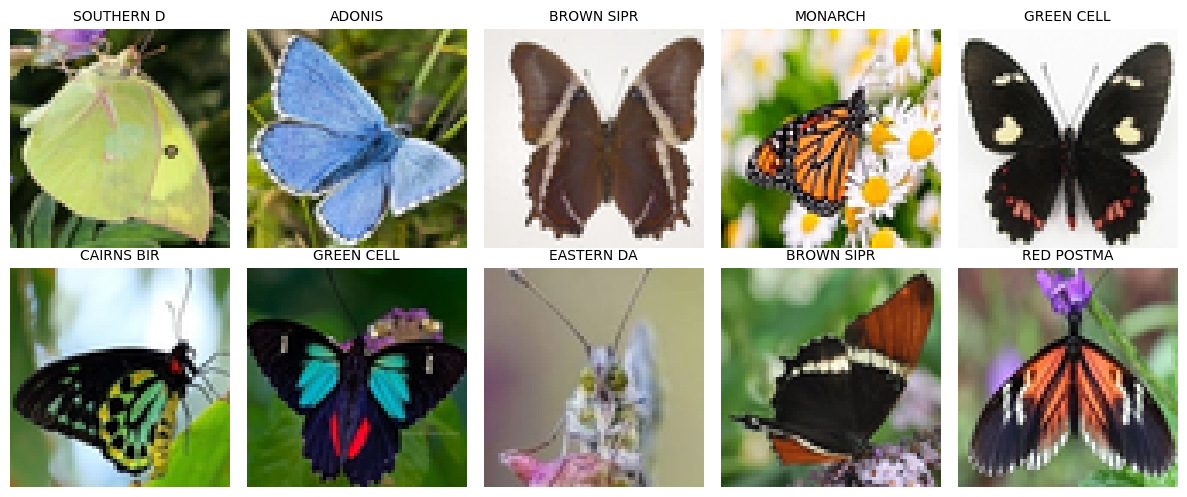

In [18]:
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    plt.title(labels[i], fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()


## Question 5 [5 points]: Show the range of pixel values in the `images` array as `[min, max]`.


### Answer:

In [19]:
pixel_min = images.min()
pixel_max = images.max()

print(f"Pixel value range: [{pixel_min}, {pixel_max}]")


Pixel value range: [0, 255]


## Question 6 [5 points]: Normalize the pixel values to the range of `[0, 1]`.

### Answer:

In [21]:
images = images.astype("float32") / 255.0
print(f"Normalized pixel value range: [{images.min()}, {images.max()}]")


Normalized pixel value range: [0.0, 1.0]


## Question 7 [10 points]: Convert the string labels to integer labels. Store the resultant integer labels in a numpy array `y`.

### Answer:

In [22]:
# Create a mapping from string labels to integers
label_to_int = {label: idx for idx, label in enumerate(sorted(set(labels)))}

# Convert string labels to integer labels
y = np.array([label_to_int[label] for label in labels])


In [23]:
print("First 10 integer labels:", y[:10])
print("Label mapping example:", list(label_to_int.items())[:5])


First 10 integer labels: [66  0 12 44 33 14 33 27 12 60]
Label mapping example: [('ADONIS', 0), ('AFRICAN GI', 1), ('AMERICAN S', 2), ('AN 88', 3), ('APPOLLO', 4)]


## Quesetion 8 [10 points]: Split the normalized data and labels into training and test sets with the ratio 80:20. Ensure the label distribution is reflected in both training and test sets.

### Answer:

In [25]:
from sklearn.model_selection import train_test_split


In [26]:
# Perform stratified train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    images, y, test_size=0.2, random_state=42, stratify=y
)

# Confirm result
print("Training set shape:", X_train.shape, "Labels:", y_train.shape)
print("Test set shape:", X_test.shape, "Labels:", y_test.shape)


Training set shape: (5199, 64, 64, 3) Labels: (5199,)
Test set shape: (1300, 64, 64, 3) Labels: (1300,)


## Question 9 [10 points]: Write a Keras program to define a 2-layer neural network model.

The model should take images of shape (64, 64, 3) as input and classify them into 75 categories. It should consist of the following layers:

- An input layer matching the given image shape.
- A dense hidden layer with 512 neurons and ReLU activation.
- An output layer with 75 neurons and softmax activation for multi-class classification.
Print the model summary after defining the architecture.

### Answer:

## Question 10 [10 points]: Compile, Train, and Test the Model:
- Compile the model using the Adam optimizer and sparse categorical cross-entropy as the loss function.
- Use `learning_rate=1e-3`.
- Use accuracy as the evaluation metric.
- Train the model on the provided training dataset (X_train, y_train) for 20 epochs with a batch size of 32.
- Use the test dataset (X_test, y_test) for validation.
- Store the training history in a variable.
- Plot the training and validation accuracy and loss over epochs after training.

### Answer:

## Question 11 [10 points]:  Do you find the performance of the 2-layer neural network satisfactory? In this question, design a neural network that outperforms the 2-layer NN.

### Answer:

## Question 12 [20 points]: Compare and analyze the performance of the 2 neural networks you have developed and evaluated.

- Compare the accuracy trends of both models. Which model achieves higher accuracy, and how quickly does it converge?
- Compare the training and validation loss curves. Does either model show signs of overfitting or underfitting?
- Explain how each model processes image data. Why does one model perform better than other for the butterfly classification?


### Answer: